<a href="https://colab.research.google.com/github/raglicia/TrabalhoFinal_sistemas_inteligentes/blob/main/TrabalhoFinalSi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#metricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/datasets'
files = os.listdir(folder_path)
print("Arquivos na pasta:", files)


Arquivos na pasta: ['archive (4).zip', 'extracted']


In [ ]:
zip_path = '/content/drive/MyDrive/datasets/archive (4).zip'
extract_folder = '/content/drive/MyDrive/datasets/extracted'

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Arquivos extraídos com sucesso!")
print("Arquivos na pasta extraída:", os.listdir(extract_folder))

Arquivos extraídos com sucesso!
Arquivos na pasta extraída: ['heart.csv']


## visão inicial dos dados

In [ ]:
file_path = '/content/drive/MyDrive/datasets/extracted/heart.csv'
data = pd.read_csv(file_path)

# Mostrar informações
print("Formato do dataset:", data.shape)
display(data.head())

Formato do dataset: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## distribuição das classes da variável alvo

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
# Mostrar o número total de amostras
print("Número de amostras (linhas):", len(data))
print("Número de colunas:", data.shape[1])

Número de amostras (linhas): 918
Número de colunas: 12


In [ ]:
print("\nValores nulos por coluna:")
print(data.isnull().sum())


Valores nulos por coluna:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
print("\nEstatísticas descritivas:")
display(data.describe())


Estatísticas descritivas:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Mostrar os nomes das colunas exatamente como estão
print(data.columns)



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


## plotar a distribuição das variáveis do dataset

/tmp/ipython-input-1924482223.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette=[colors[i]])
/tmp/ipython-input-1924482223.py:38: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=data, ax=axes[i], palette=[colors[i]])
/tmp/ipython-input-1924482223.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette=[colors[i]])
/tmp/ipython-input-1924482223.py:38: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=dat

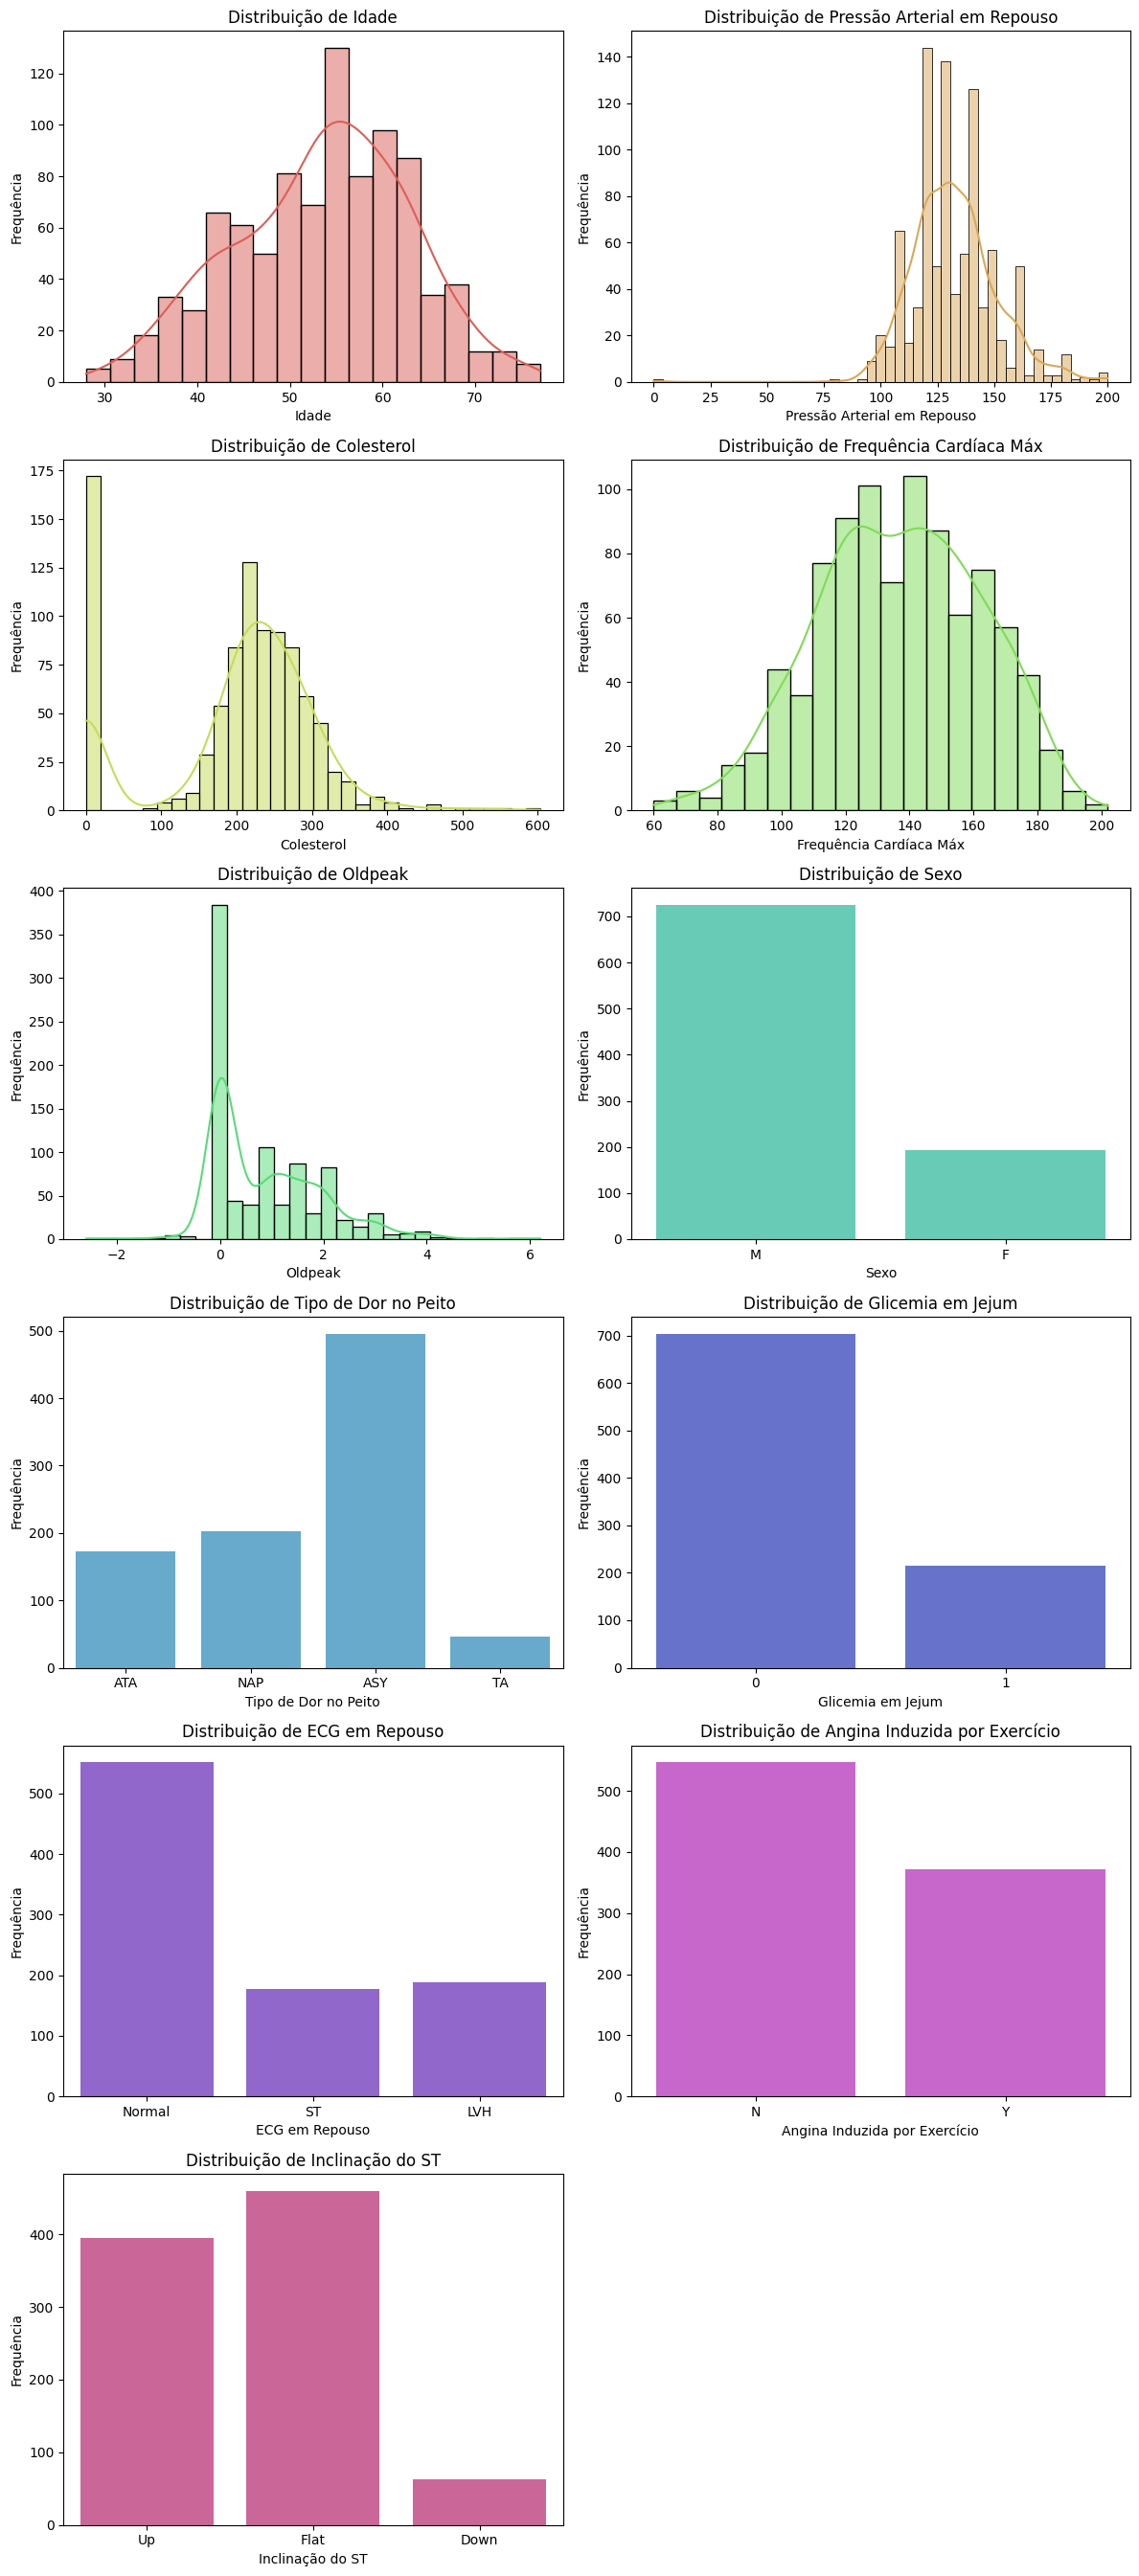

In [ ]:
# Dicionário para traduzir os nomes das colunas
nomes_pt = {
    "Age": "Idade",
    "RestingBP": "Pressão Arterial em Repouso",
    "Cholesterol": "Colesterol",
    "FastingBS": "Glicemia em Jejum",
    "MaxHR": "Frequência Cardíaca Máx",
    "Oldpeak": "Oldpeak",
    "Sex": "Sexo",
    "ChestPainType": "Tipo de Dor no Peito",
    "RestingECG": "ECG em Repouso",
    "ExerciseAngina": "Angina Induzida por Exercício",
    "ST_Slope": "Inclinação do ST",
}

# Detecta variáveis categóricas (menos de 11 valores únicos, excluindo a variável alvo)
categorical_vars = [col for col in data.columns if (data[col].nunique() < 11 and col not in ['HeartDisease'])]

# Colunas numéricas para escalonamento (excluindo categóricas e variável alvo)
cols2scale = [col for col in data.columns if col not in categorical_vars + ['HeartDisease']]

# Combina colunas para plotagem: numéricas para histogramas, categóricas para gráficos de barras
columns_to_plot = cols2scale + categorical_vars

# Número de subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 1) // 2

# Cria os subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4.5))
axes = axes.flatten()
colors = sns.color_palette("hls", num_cols)

# Loop para criar os gráficos
for i, col in enumerate(columns_to_plot):
    nome_col = nomes_pt.get(col, col)
    if col in categorical_vars:
        sns.countplot(x=col, data=data, ax=axes[i], palette=[colors[i]])
    else:
        sns.histplot(data[col], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribuição de {nome_col}')
    axes[i].set_xlabel(nome_col)
    axes[i].set_ylabel('Frequência')

# Remove subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Criar uma cópia do dataset
data_encoded = data.copy()

#converter colunas categóricas binárias em 0 e 1
data_encoded['Sex'] = data_encoded['Sex'].map({'M': 1, 'F': 0})

# Se houver mais colunas categóricas com mais de 2 categorias, use get_dummies
data_encoded = pd.get_dummies(data_encoded, drop_first=True)


# Matriz de correlações

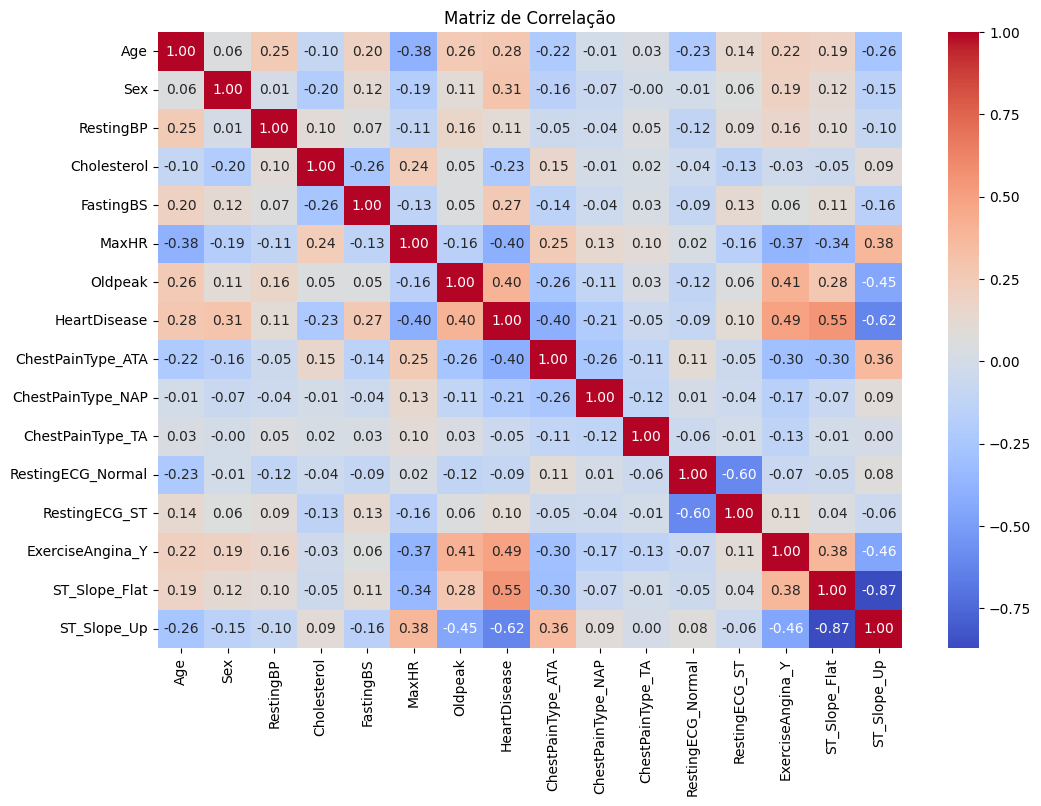

In [ ]:
# Explorar correlações entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # annot=True mostra os valores de correlação
plt.title('Matriz de Correlação')
plt.show()

## Vizualização rapida dos dados

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
X = data_encoded.drop("HeartDisease", axis=1)
y = data_encoded["HeartDisease"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#### Random Forest

In [ ]:
# 1. Definir o modelo base
rf = RandomForestClassifier(random_state=42)

# 2. Definir os hiperparâmetros que deseja testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Configurar o GridSearch com k-fold (cv=5)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 4. Rodar no conjunto de treino
grid_search.fit(X_train, y_train)

# 5. Ver os melhores parâmetros e score
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia média:", grid_search.best_score_)

# 6. Avaliar no teste final
melhor_rf = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Melhor acurácia média: 0.8787531450936539


#### MLP

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(32,16), (64,32), (128,64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}


grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor Melhor acurácia média:", grid_search.best_score_)

melhor_mlp = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'solver': 'sgd'}
Melhor Melhor acurácia média: 0.8733109682229057


#### KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidiana
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia média", grid_search.best_score_)

# 6. Avaliar no teste final
melhor_knn = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Melhor acurácia média 0.7199809931100024


# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia média", grid_search.best_score_)


melhor_gb = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Melhor acurácia média 0.8267046804466618


### LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia média", grid_search.best_score_)


melhor_lr = grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor acurácia média 0.8623986580933745


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def avaliar_modelo_teste(modelo_treinado, X_test, y_test, nome_modelo):
    # Previsões
    y_pred = modelo_treinado.predict(X_test)
    y_proba = modelo_treinado.predict_proba(X_test)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotar matriz de confusão
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Positivo'],
                yticklabels=['Negativo', 'Positivo'],
                annot_kws={"size": 14})
    plt.xlabel('Predição', fontsize=12)
    plt.ylabel('Real', fontsize=12)
    plt.title(f'Matriz de Confusão - {nome_modelo}', fontsize=12)
    plt.show()

    # Imprimir métricas
    print(f" Métricas do modelo {nome_modelo}:")
    print(f"Accuracy  : {accuracy:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall    : {recall:.3f}")
    print(f"F1-Score  : {f1:.3f}")
    print(f"AUC-ROC   : {auc_roc:.3f}\n")

    # Retornar métricas e matriz
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'conf_matrix': conf_matrix
    }


## Matrizes de confusão e Resultado das metricas

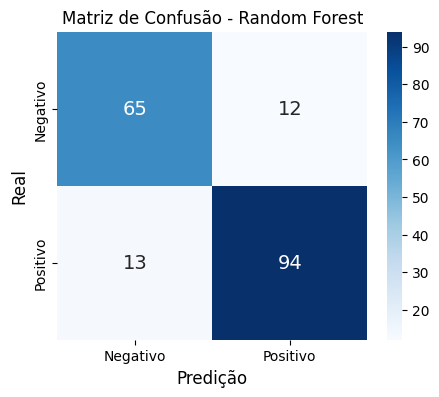

 Métricas do modelo Random Forest:
Accuracy  : 0.864
Precision : 0.887
Recall    : 0.879
F1-Score  : 0.883
AUC-ROC   : 0.925



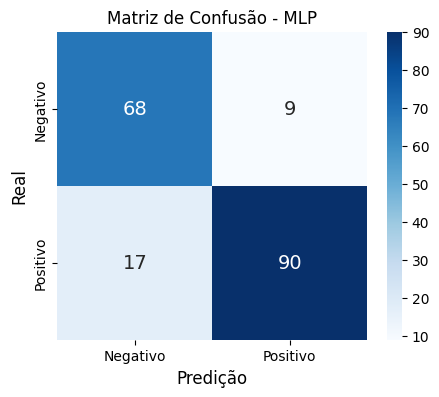

 Métricas do modelo MLP:
Accuracy  : 0.859
Precision : 0.909
Recall    : 0.841
F1-Score  : 0.874
AUC-ROC   : 0.930



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


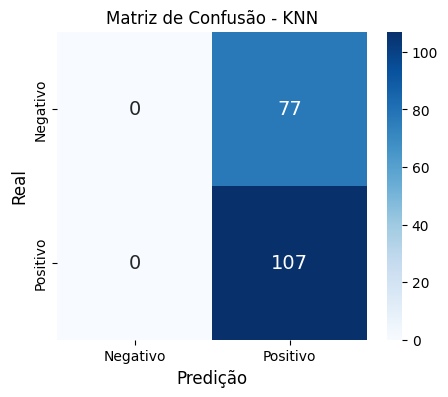

 Métricas do modelo KNN:
Accuracy  : 0.582
Precision : 0.582
Recall    : 1.000
F1-Score  : 0.735
AUC-ROC   : 0.764



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


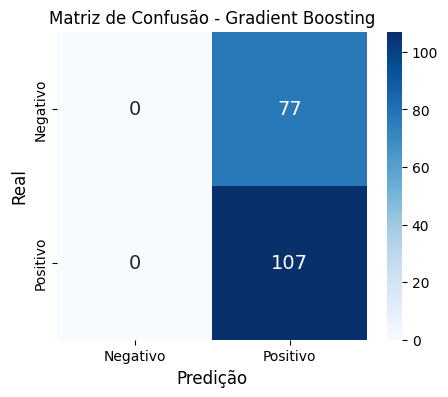

 Métricas do modelo Gradient Boosting:
Accuracy  : 0.582
Precision : 0.582
Recall    : 1.000
F1-Score  : 0.735
AUC-ROC   : 0.897



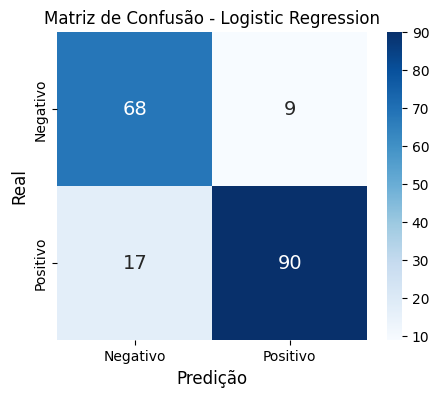

 Métricas do modelo Logistic Regression:
Accuracy  : 0.859
Precision : 0.909
Recall    : 0.841
F1-Score  : 0.874
AUC-ROC   : 0.926



In [ ]:
resultados_rf = avaliar_modelo_teste(melhor_rf, X_test, y_test, "Random Forest")
resultados_mlp = avaliar_modelo_teste(melhor_mlp, X_test, y_test, "MLP")
resultados_knn = avaliar_modelo_teste(melhor_knn, X_test, y_test, "KNN")
resultados_gb = avaliar_modelo_teste(melhor_gb, X_test, y_test, "Gradient Boosting")
resultados_lr = avaliar_modelo_teste(melhor_lr, X_test, y_test, "Logistic Regression")
